In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("netflix_titles.csv")

In [6]:
df.head()

show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
3  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   

                                           listed_in  \
0                                      Documentaries   
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
3                             Docuseries, Reality TV   
4  International TV Shows, Romantic TV Shows, TV ...   

                                         description  
0  As her father nears the end of his life, filmm...  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
3  Feuds, flirtations and toilet talk go down amo...  
4  In a city of coaching centers known to train I...

In [7]:
df.shape

(8807, 12)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [9]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [10]:
df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1714
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [13]:
import missingno as msno

<Axes: >

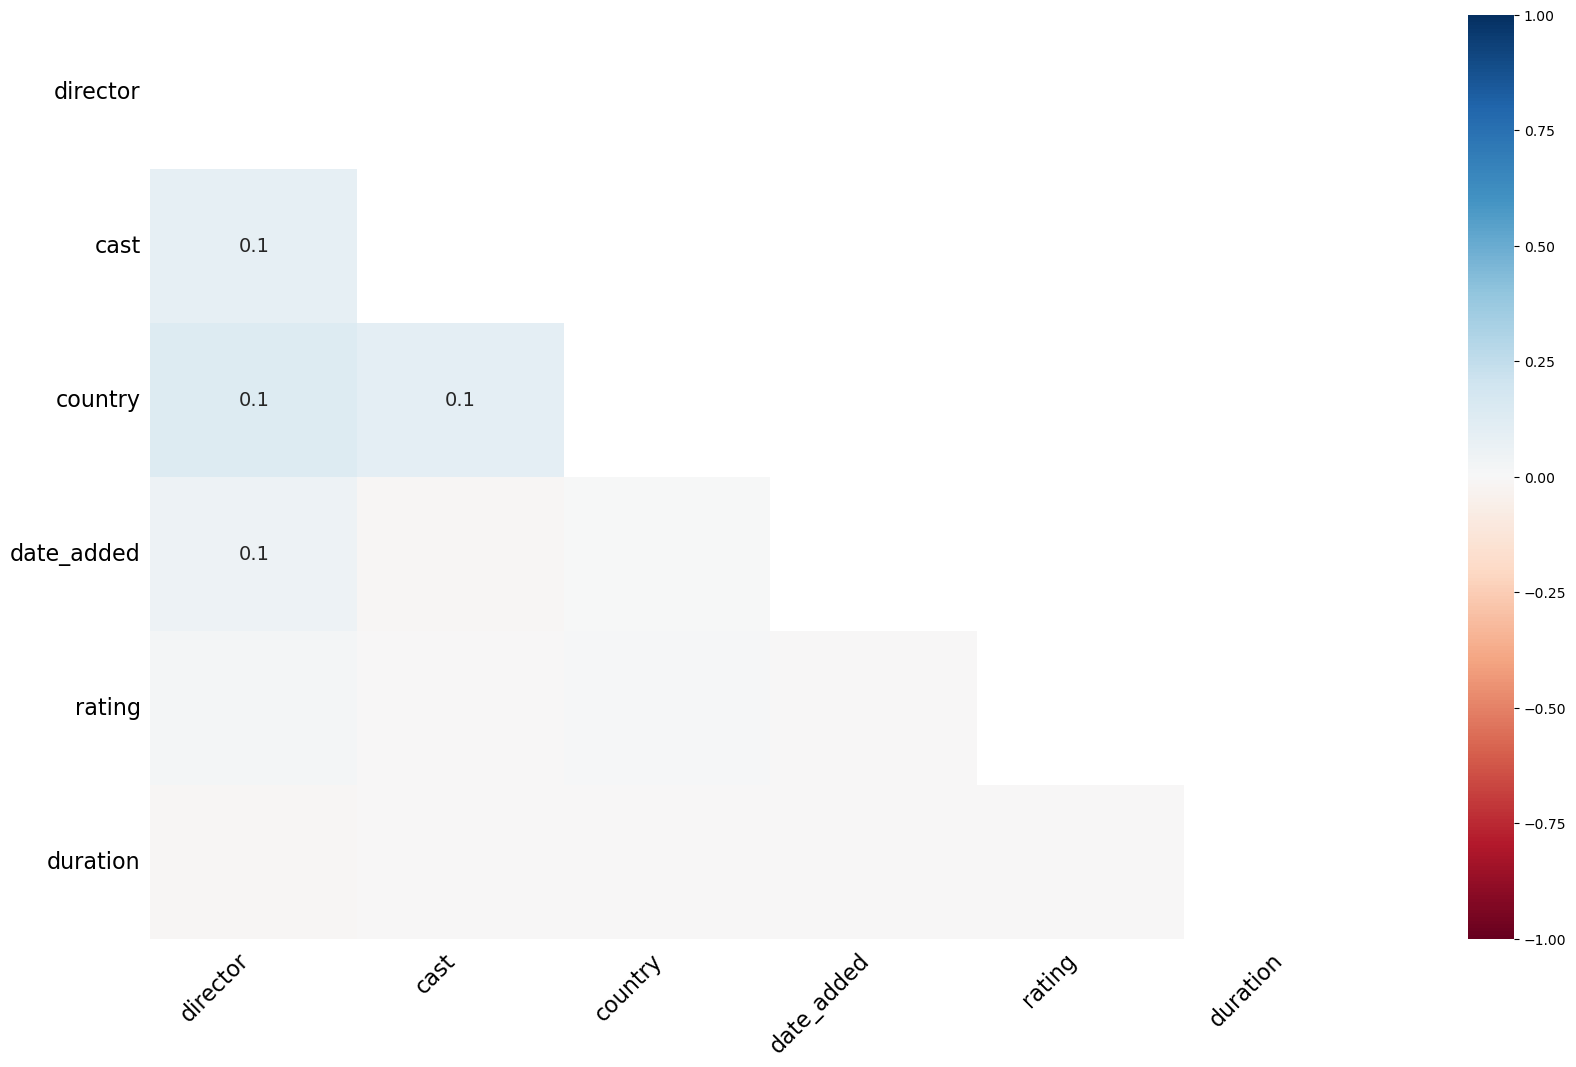

In [14]:
msno.heatmap(df)

In [15]:
df[df['type'].isna()]

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description]
Index: []

In [16]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [17]:
changing_nan = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in changing_nan.items():
    df.iloc[id, 6] = rate
    
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [18]:
df = df[df['cast'].notna()]
df['cast'].isna().sum()

0

In [19]:
import collections

In [20]:
collections.Counter(df['country']).most_common(1)

[('United States', 2488)]

In [21]:
df['country'] = df['country'].fillna('United States')


In [22]:
df['country'].isna().sum()

0

In [23]:
df.isnull().sum()

show_id            0
type               0
title              0
director        2282
cast               0
country            0
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [24]:
df.head()

show_id     type                             title  \
1      s2  TV Show                     Blood & Water   
2      s3  TV Show                         Ganglands   
4      s5  TV Show                      Kota Factory   
5      s6  TV Show                     Midnight Mass   
6      s7    Movie  My Little Pony: A New Generation   

                        director  \
1                            NaN   
2                Julien Leclercq   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   

                                                cast        country  \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...  United States   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   
5  Kate Siegel, Zach Gilford, Hamish Linklater, H...  United States   
6  Vanessa Hudgens, Kimiko Glenn, James Marsden, ...  United States   

           date_added  release_year rating   duration  \
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021          2021  TV-MA   1 Season   
4  September 24, 2021          2021  TV-MA  2 Seasons   
5  September 24, 2021          2021  TV-MA   1 Season   
6  September 24, 2021          2021     PG     91 min   

                                           listed_in  \
1    International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Act...   
4  International TV Shows, Romantic TV Shows, TV ...   
5                 TV Dramas, TV Horror, TV Mysteries   
6                           Children & Family Movies   

                                         description  
1  After crossing paths at a party, a Cape Town t...  
2  To protect his family from a powerful drug lor...  
4  In a city of coaching centers known to train I...  
5  The arrival of a charismatic young priest brin...  
6  Equestria's divided. But a bright-eyed hero be...

In [25]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


In [26]:
import pandas as pd
!pip install AutoViz
from autoviz.AutoViz_Class import AutoViz_Class

Imported v0.1.905. Please call AutoViz in this sequence:
    AV = AutoViz_Class()
    %matplotlib inline
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)


In [27]:
from autoviz.AutoViz_Class import AutoViz_Class

In [28]:
autoviz = AutoViz_Class().AutoViz("netflix_titles.csv")

Shape of your Data Set loaded: (8807, 12)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    Number of Numeric Columns =  0
    Number of Integer-Categorical Columns =  0
    Number of String-Categorical Columns =  1
    Number of Factor-Categorical Columns =  0
    Number of String-Boolean Columns =  1
    Number of Numeric-Boolean Columns =  0
    Number of Discrete String Columns =  3
    Number of NLP String Columns =  5
    Number of Date Time Columns =  1
    Number of ID Columns =  1
    Number of Columns to Delete =  0
    12 Predictors classified...
        1 variable(s) removed since they were ID or low-information variables
        List of variables removed: ['show_id']
To fix these data quality issues in the dataset, import 

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /Users/anushkamishra/nltk_data...
[nltk_dat

All Plots done
Time to run AutoViz = 33 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [29]:
old = df.sort_values("release_year", ascending = True)
old = old[old['duration'] != ""]
old = old[old['type'] !="TV Show"]
old[['title', "release_year","country","duration"]][:15]

title            release_year            country              \
8205     The Battle of Midway      1942                      United States   
8640         Tunisian Victory      1944      United States, United Kingdom   
7219  Know Your Enemy - Japan      1945                      United States   
7294       Let There Be Light      1946                      United States   
8587              Thunderbolt      1947                      United States   
1699          White Christmas      1954                      United States   
2375          The Blazing Sun      1954                              Egypt   
7954      Scandal in Sorrento      1955                      Italy, France   
8506        The Sign of Venus      1955                              Italy   
7839    Rebel Without a Cause      1955                      United States   
2369              Dark Waters      1956                              Egypt   
6784         Forbidden Planet      1956                      United States   
2368            Cairo Station      1958                              Egypt   
6853                     Gigi      1958                      United States   
6431    Cat on a Hot Tin Roof      1958                      United States   

     duration  
8205   18 min  
8640   76 min  
7219   63 min  
7294   58 min  
8587   42 min  
1699  120 min  
2375  116 min  
7954   93 min  
8506   97 min  
7839  111 min  
2369  104 min  
6784   98 min  
2368   73 min  
6853  115 min  
6431  108 min

In [30]:
old = df.sort_values("release_year", ascending = False)
old = old[old['duration'] != ""]
old = old[old['type'] !="TV Show"]
old[['title', "release_year","country","duration"]][:15]

title                       release_year  \
750                                   Tragic Jungle      2021       
755                   Kitty Love: An Homage to Cats      2021       
757  Breaking Boundaries: The Science Of Our Planet      2021       
762                                    Sweet & Sour      2021       
764                    Trippin' with the Kandasamys      2021       
765                                          Xtreme      2021       
766                         Alan Saldaña: Locked Up      2021       
768                                  Dancing Queens      2021       
770                       Myriam Fares: The Journey      2021       
783                                        Carnaval      2021       
811               Super Monsters: Once Upon a Rhyme      2021       
746                                           Awake      2021       
742                                Camellia Sisters      2021       
711                                        Security      2021       
717                     Headspace: Unwind Your Mind      2021       

             country          duration  
750  Mexico, France, Colombia   97 min  
755               Netherlands   61 min  
757             United States   74 min  
762               South Korea  103 min  
764              South Africa   94 min  
765                     Spain  112 min  
766                    Mexico   49 min  
768                    Sweden  111 min  
770      United Arab Emirates   72 min  
783                    Brazil   95 min  
811             United States   25 min  
746             United States   97 min  
742                   Vietnam  117 min  
711                     Italy  119 min  
717             United States  273 min

In [31]:
import plotly.express as px

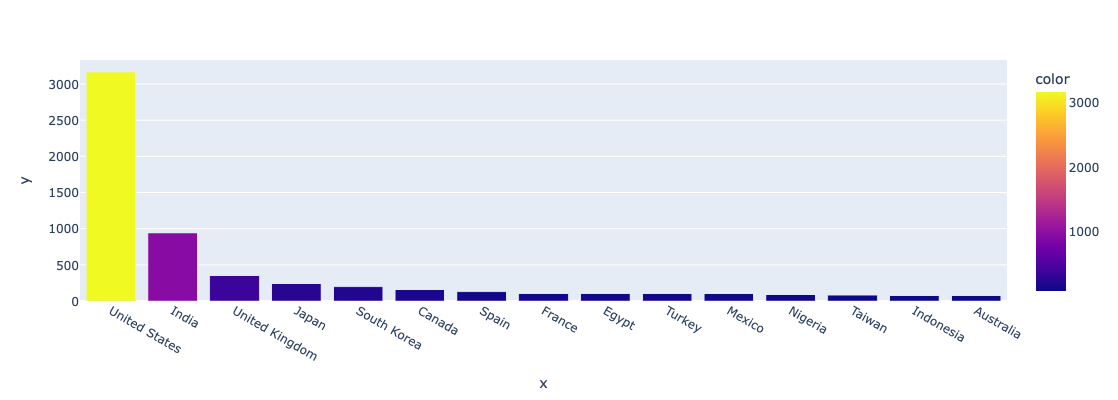

In [32]:
country  = df['country'].value_counts()
country = country[:15,]
fig = px.bar(x=country.index, y=country.values, color=country.values,
             hover_data=[country.index, country.values],labels={'country':'Frequency'}, height=400)
fig.show()

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfv = TfidfVectorizer(min_df = 3,max_features = None,analyzer = 'word',token_pattern = 'r\w{1,}', ngram_range = (1,3), stop_words = 'english')

In [34]:
df.head()

show_id   type                 title                \
1    s2    TV Show                     Blood & Water   
2    s3    TV Show                         Ganglands   
4    s5    TV Show                      Kota Factory   
5    s6    TV Show                     Midnight Mass   
6    s7      Movie  My Little Pony: A New Generation   

             director             \
1                            NaN   
2                Julien Leclercq   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   

                                                                                                                                                        cast                                                                                                                                                        \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2                                                                                                                                                              Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera   
4                                                                                                                                                                                                         Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar   
5                                                                         Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver   
6                                                                                                                                                                Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr   

     country          date_added      release_year rating  duration   \
1   South Africa  September 24, 2021      2021      TV-MA  2 Seasons   
2  United States  September 24, 2021      2021      TV-MA   1 Season   
4          India  September 24, 2021      2021      TV-MA  2 Seasons   
5  United States  September 24, 2021      2021      TV-MA   1 Season   
6  United States  September 24, 2021      2021         PG     91 min   

                            listed_in                             \
1                International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
4         International TV Shows, Romantic TV Shows, TV Comedies   
5                             TV Dramas, TV Horror, TV Mysteries   
6                                       Children & Family Movies   

                                                                         description                                                                          
1        After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.  
2         To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.  
4   In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.  
5   The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed religio

In [35]:
df['combined'] = df['description']+df['cast']+df['director']
df.head(5)

show_id   type                 title                \
1    s2    TV Show                     Blood & Water   
2    s3    TV Show                         Ganglands   
4    s5    TV Show                      Kota Factory   
5    s6    TV Show                     Midnight Mass   
6    s7      Movie  My Little Pony: A New Generation   

             director             \
1                            NaN   
2                Julien Leclercq   
4                            NaN   
5                  Mike Flanagan   
6  Robert Cullen, José Luis Ucha   

                                                                                                                                                        cast                                                                                                                                                        \
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thabang Molaba, Dillon Windvogel, Natasha Thahane, Arno Greeff, Xolile Tshabalala, Getmore Sithole, Cindy Mahlangu, Ryle De Morny, Greteli Fincham, Sello Maake Ka-Ncube, Odwa Gwanya, Mekaila Mathys, Sandi Schultz, Duane Williams, Shamilla Miller, Patrick Mofokeng   
2                                                                                                                                                              Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabiha Akkari, Sofia Lesaffre, Salim Kechiouche, Noureddine Farihi, Geert Van Rampelberg, Bakary Diombera   
4                                                                                                                                                                                                         Mayur More, Jitendra Kumar, Ranjan Raj, Alam Khan, Ahsaas Channa, Revathi Pillai, Urvi Singh, Arun Kumar   
5                                                                         Kate Siegel, Zach Gilford, Hamish Linklater, Henry Thomas, Kristin Lehman, Samantha Sloyan, Igby Rigney, Rahul Kohli, Annarah Cymone, Annabeth Gish, Alex Essoe, Rahul Abburi, Matt Biedel, Michael Trucco, Crystal Balint, Louis Oliver   
6                                                                                                                                                                Vanessa Hudgens, Kimiko Glenn, James Marsden, Sofia Carson, Liza Koshy, Ken Jeong, Elizabeth Perkins, Jane Krakowski, Michael McKean, Phil LaMarr   

     country          date_added      release_year rating  duration   \
1   South Africa  September 24, 2021      2021      TV-MA  2 Seasons   
2  United States  September 24, 2021      2021      TV-MA   1 Season   
4          India  September 24, 2021      2021      TV-MA  2 Seasons   
5  United States  September 24, 2021      2021      TV-MA   1 Season   
6  United States  September 24, 2021      2021         PG     91 min   

                            listed_in                             \
1                International TV Shows, TV Dramas, TV Mysteries   
2  Crime TV Shows, International TV Shows, TV Action & Adventure   
4         International TV Shows, Romantic TV Shows, TV Comedies   
5                             TV Dramas, TV Horror, TV Mysteries   
6                                       Children & Family Movies   

                                                                         description                                                                          \
1        After crossing paths at a party, a Cape Town teen sets out to prove whether a private-school swimming star is her sister who was abducted at birth.   
2         To protect his family from a powerful drug lord, skilled thief Mehdi and his expert team of robbers are pulled into a violent and deadly turf war.   
4   In a city of coaching centers known to train India’s finest collegiate minds, an earnest but unexceptional student and his friends navigate campus life.   
5   The arrival of a charismatic young priest brings glorious miracles, ominous mysteries and renewed rel

In [36]:
df['combined'] = df['combined'].fillna("")

In [37]:
tfv_matrix = tfv.fit_transform(df['combined'])
from sklearn.metrics.pairwise import sigmoid_kernel
sig = sigmoid_kernel(tfv_matrix,tfv_matrix)
sig[0]
indices = pd.Series(df.index,index = df['title']).drop_duplicates()
indices

title
Blood & Water                          1
Ganglands                              2
Kota Factory                           4
Midnight Mass                          5
My Little Pony: A New Generation       6
                                    ... 
Zinzana                             8801
Zodiac                              8802
Zombieland                          8804
Zoom                                8805
Zubaan                              8806
Length: 7982, dtype: int64

In [38]:
def recommend(title,sig=sig):
    idx = indices[title]
    sig_scores = list(enumerate(sig[idx]))
    sig_scores = sorted(sig_scores,key = lambda x:x[1], reverse = True)
    sig_scores = sig_scores[1:11]
    movies_indices = [i[0] for i in sig_scores]
    return df['title'].iloc[movies_indices]


In [39]:
recommend("Kota Factory")

6748                                 Figaro Pho
2724                       Gori Tere Pyaar Mein
2601                               Rich in Love
8142    Sword Masters: Two Champions of Shaolin
6990                                    Honey 2
8531                           The Time Machine
3016                                        Hop
264                               Walk of Shame
7607               NOVA: Extreme Animal Weapons
8                 The Great British Baking Show
Name: title, dtype: object

In [40]:
recommend('Gargantia on the Verdurous Planet')

8512                                       The Space Between Us
582                                                Mother's Day
2778                              Bethany Hamilton: Unstoppable
1887    Best Wishes, Warmest Regards: A Schitt's Creek Farewell
2654                                                 The Set Up
5201                      Joan Didion: The Center Will Not Hold
823                                               Then Came You
6665                                    Eddie Murphy: Delirious
8623                              Tremors 3: Back to Perfection
7614                            NOVA: Prediction by the Numbers
Name: title, dtype: object

In [50]:
import pickle 

In [51]:
import pickle

pickle.dump(df, open('title.pkl', 'wb'))


In [52]:
df['title'].values

array(['Blood & Water', 'Ganglands', 'Kota Factory', ..., 'Zombieland',
       'Zoom', 'Zubaan'], dtype=object)

In [58]:
import pickle

# Load the data from the pickle file
with open('title_dict.pkl', 'rb') as file:
    loaded_data = pickle.load(file)

# Print a sample of the data (first 10 items) to avoid large output issues
print("Sample data:", list(loaded_data.items())[:10])

# Save the entire content to a text file for full inspection
with open('output_full_data.txt', 'w') as f:
    f.write(str(loaded_data))

print("Full data saved to output_full_data.txt")


Sample data: [('show_id', {1: 's2', 2: 's3', 4: 's5', 5: 's6', 6: 's7', 7: 's8', 8: 's9', 9: 's10', 11: 's12', 12: 's13', 13: 's14', 15: 's16', 17: 's18', 18: 's19', 19: 's20', 21: 's22', 22: 's23', 23: 's24', 24: 's25', 25: 's26', 26: 's27', 27: 's28', 28: 's29', 29: 's30', 30: 's31', 31: 's32', 32: 's33', 33: 's34', 34: 's35', 35: 's36', 36: 's37', 37: 's38', 38: 's39', 39: 's40', 40: 's41', 41: 's42', 42: 's43', 43: 's44', 44: 's45', 46: 's47', 47: 's48', 48: 's49', 49: 's50', 50: 's51', 51: 's52', 52: 's53', 53: 's54', 54: 's55', 55: 's56', 56: 's57', 57: 's58', 58: 's59', 59: 's60', 60: 's61', 61: 's62', 62: 's63', 63: 's64', 64: 's65', 65: 's66', 67: 's68', 68: 's69', 70: 's71', 71: 's72', 72: 's73', 73: 's74', 75: 's76', 76: 's77', 77: 's78', 78: 's79', 79: 's80', 80: 's81', 81: 's82', 82: 's83', 83: 's84', 84: 's85', 85: 's86', 86: 's87', 87: 's88', 88: 's89', 89: 's90', 90: 's91', 92: 's93', 93: 's94', 94: 's95', 95: 's96', 96: 's97', 97: 's98', 98: 's99', 99: 's100', 100: 's1

In [61]:
pickle.dump(indices,open('similarity.pkl','wb'))